In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('cleaned_thesis_datasetv4_rev.csv')

In [3]:
df.head()

,Age,Financial Status,Has a Laptop,Type of Internet Connection,CC100,CC101,CC102,CS111/IT112,English Prof,Reading Compre,...,GAS,HUMSS,STEM,Sports Track,TVL-HE,TVL-ICT,Female,Male,Prefer not to say,label
0,22,5,2,2,1.50,2.00,2.00,2.00,41.05,30.03,...,0,0,0,0,0,1,0,1,0,0
1,24,1,2,1,2.50,3.00,2.00,2.50,61.05,48.40,...,0,0,0,0,0,1,0,1,0,1
2,21,1,2,2,1.00,1.75,1.75,2.00,49.95,71.99,...,0,0,1,0,0,0,1,0,0,1
3,22,0,0,2,1.75,1.25,3.00,1.75,89.71,77.12,...,0,0,0,0,0,0,0,1,0,1
4,23,1,2,2,1.25,1.25,1.75,1.75,95.51,71.99,...,0,0,0,0,0,1,1,0,0,1


In [4]:
df.shape

(424, 26)

In [5]:
features = df.columns[:25]
features

Index(['Age', 'Financial Status', 'Has a Laptop',
       'Type of Internet Connection', 'CC100', 'CC101', 'CC102', 'CS111/IT112',
       'English Prof', 'Reading Compre', 'Science Process', 'Quantitative',
       'Abstract', 'CET OAPR', 'SHS/HS GPA', 'ABM/BAM', 'GAS', 'HUMSS', 'STEM',
       'Sports Track', 'TVL-HE', 'TVL-ICT', 'Female', 'Male',
       'Prefer not to say'],
      dtype='object')

In [6]:
target = df.columns[-1:]
target

Index(['label'], dtype='object')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


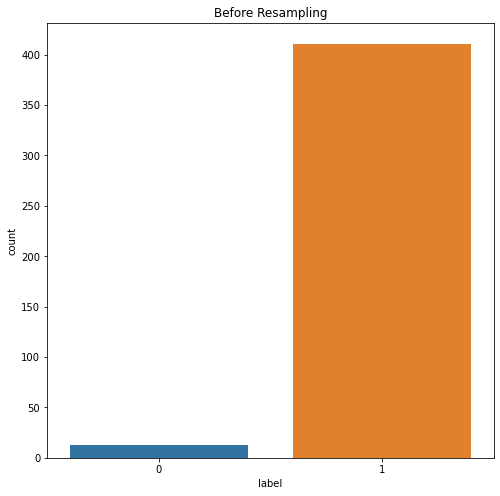

In [7]:
plt.figure(figsize=(8, 8))
sns.countplot(df['label'], data=df)
plt.title('Before Resampling')
plt.show()

In [8]:
df.label.value_counts()

1    411
0     13
Name: label, dtype: int64

## Training and Testing of dataset with 90:10 split of train and test data

In [9]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.5, random_state=0, stratify=df['label'])

In [10]:
# Load the dataset
X_train = train[features]
y_train = train[target]
X_test = test[features]
y_test = test[target]

#Balance dataset using SMOTE (Oversampling)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

#Balance dataset using RandomUndersampling (Undersampling)
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

In [11]:
# describes info about train and test set
print('Imbalanced Train Data:')
print("X_train dataset: ", X_train.shape)
print("y_train dataset: ", y_train.shape)
print('*********************************')
print('Oversampling Train Data:')
print("X_train dataset: ", X_train_smote.shape)
print("y_train dataset: ", y_train_smote.shape)
print('*********************************')
print('Undersampling Train Data:')
print("X_train dataset: ", X_train_rus.shape)
print("y_train dataset: ", y_train_rus.shape)
print('*********************************')
print('Test Data:')
print("X_test dataset: ", X_test.shape)
print("y_test dataset: ", y_test.shape)

Imbalanced Train Data:
X_train dataset:  (212, 25)
y_train dataset:  (212, 1)
*********************************
Oversampling Train Data:
X_train dataset:  (412, 25)
y_train dataset:  (412, 1)
*********************************
Undersampling Train Data:
X_train dataset:  (12, 25)
y_train dataset:  (12, 1)
*********************************
Test Data:
X_test dataset:  (212, 25)
y_test dataset:  (212, 1)


In [12]:
y_test.value_counts()

label
1        205
0          7
dtype: int64

## Spot Check Algorithms and Evaluation Metrics

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier, BaggingClassifier

from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score
from numpy import mean
from numpy import std
import numpy as np
import math

### Include Stacking and Bagging Ensemble in building models

In [14]:
# get a stacking ensemble of models
def get_stacking():
    # base models for stacking ensemble
    base_models = [('rf', RandomForestClassifier(n_estimators=100)),
               ('lr', LogisticRegression(max_iter=400)),
               ('svml', SVC(kernel = 'linear')),
               ('svmp', SVC(kernel = 'poly')),
               ('nb', GaussianNB()),
               ('knn', KNeighborsClassifier(n_neighbors=3)),
               ('ann', MLPClassifier(random_state=1, max_iter=500)),
               ('dt', DecisionTreeClassifier())
              ]
    stack = StackingClassifier(estimators=base_models, final_estimator=LogisticRegression())
    return stack

# define models
models = dict()
models['Random Forest'] = RandomForestClassifier(n_estimators=100)
models['Logistic Regression'] = LogisticRegression()
models['SVM linear'] = SVC(kernel = 'linear')
models['SVM poly'] = SVC(kernel = 'poly')
models['Naive Bayes'] = GaussianNB()
models['K-Nearest Neighbors'] = KNeighborsClassifier(n_neighbors=3)
models['Artificial Neural Network'] = MLPClassifier(random_state=1, max_iter=300)
models['Decision Tree'] = DecisionTreeClassifier()
models['stacking'] = get_stacking()
models['bagging'] = BaggingClassifier()

In [15]:
results = dict()
print('\n******************************************************')
for name, model in models.items():
    model.fit(X_train, y_train.values.ravel())
    predicted = model.predict(X_test)
    print('\nAlgorithm: ',name)
    res_cm = confusion_matrix(y_test, predicted)
    print('Confusion Matrix:\n',res_cm)
    res_acc = accuracy_score(y_test, predicted)
    print('Accuracy:',res_acc)
    print(classification_report(y_test, predicted, digits=3))
    res_auc_roc_score = roc_auc_score(y_test, predicted)
    print('AUC-ROC Score: {:.3f}'.format(res_auc_roc_score))
    print('\n******************************************************')


******************************************************

Algorithm:  Random Forest
Confusion Matrix:
 [[  0   7]
 [  0 205]]
Accuracy: 0.9669811320754716
              precision    recall  f1-score   support

           0      0.000     0.000     0.000         7
           1      0.967     1.000     0.983       205

    accuracy                          0.967       212
   macro avg      0.483     0.500     0.492       212
weighted avg      0.935     0.967     0.951       212

AUC-ROC Score: 0.500

******************************************************

Algorithm:  Logistic Regression
Confusion Matrix:
 [[  1   6]
 [  1 204]]
Accuracy: 0.9669811320754716
              precision    recall  f1-score   support

           0      0.500     0.143     0.222         7
           1      0.971     0.995     0.983       205

    accuracy                          0.967       212
   macro avg      0.736     0.569     0.603       212
weighted avg      0.956     0.967     0.958       212

AUC-ROC Sco

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\line


Algorithm:  SVM linear
Confusion Matrix:
 [[  1   6]
 [  1 204]]
Accuracy: 0.9669811320754716
              precision    recall  f1-score   support

           0      0.500     0.143     0.222         7
           1      0.971     0.995     0.983       205

    accuracy                          0.967       212
   macro avg      0.736     0.569     0.603       212
weighted avg      0.956     0.967     0.958       212

AUC-ROC Score: 0.569

******************************************************

Algorithm:  SVM poly
Confusion Matrix:
 [[  0   7]
 [  0 205]]
Accuracy: 0.9669811320754716
              precision    recall  f1-score   support

           0      0.000     0.000     0.000         7
           1      0.967     1.000     0.983       205

    accuracy                          0.967       212
   macro avg      0.483     0.500     0.492       212
weighted avg      0.935     0.967     0.951       212

AUC-ROC Score: 0.500

******************************************************

Alg

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metr



******************************************************


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_


Algorithm:  stacking
Confusion Matrix:
 [[  0   7]
 [  0 205]]
Accuracy: 0.9669811320754716
              precision    recall  f1-score   support

           0      0.000     0.000     0.000         7
           1      0.967     1.000     0.983       205

    accuracy                          0.967       212
   macro avg      0.483     0.500     0.492       212
weighted avg      0.935     0.967     0.951       212

AUC-ROC Score: 0.500

******************************************************

Algorithm:  bagging
Confusion Matrix:
 [[  0   7]
 [  3 202]]
Accuracy: 0.9528301886792453
              precision    recall  f1-score   support

           0      0.000     0.000     0.000         7
           1      0.967     0.985     0.976       205

    accuracy                          0.953       212
   macro avg      0.483     0.493     0.488       212
weighted avg      0.935     0.953     0.944       212

AUC-ROC Score: 0.493

******************************************************


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Resampling the trained data using Oversampling method (SMOTE)

### Include Stacking and Bagging Ensemble in building models

In [16]:
# get a stacking ensemble of models
def get_stacking():
    # base models for stacking ensemble
    base_models = [('rf', RandomForestClassifier(n_estimators=100)),
               ('lr', LogisticRegression(max_iter=400)),
               ('svml', SVC(kernel = 'linear')),
               ('svmp', SVC(kernel = 'poly')),
               ('nb', GaussianNB()),
               ('knn', KNeighborsClassifier(n_neighbors=3)),
               ('ann', MLPClassifier(random_state=1, max_iter=500)),
               ('dt', DecisionTreeClassifier())
              ]
    stack = StackingClassifier(estimators=base_models, final_estimator=LogisticRegression())
    return stack

# define models
models_smote = dict()
models_smote['Random Forest'] = RandomForestClassifier(n_estimators=100)
models_smote['Logistic Regression'] = LogisticRegression()
models_smote['SVM linear'] = SVC(kernel = 'linear')
models_smote['SVM poly'] = SVC(kernel = 'poly')
models_smote['Naive Bayes'] = GaussianNB()
models_smote['K-Nearest Neighbors'] = KNeighborsClassifier(n_neighbors=3)
models_smote['Artificial Neural Network'] = MLPClassifier(random_state=1, max_iter=300)
models_smote['Decision Tree'] = DecisionTreeClassifier()
models_smote['stacking'] = get_stacking()
models_smote['bagging'] = BaggingClassifier()

In [17]:
results = dict()
print('\n******************************************************')
for name, model in models_smote.items():
    model.fit(X_train_smote, y_train_smote.values.ravel())
    predicted = model.predict(X_test)
    print('\nAlgorithm: ',name)
    res_cm = confusion_matrix(y_test, predicted)
    print('\n     Route 1')
    print('Confusion Matrix:\n',res_cm)
    res_acc = accuracy_score(y_test, predicted)
    print('Accuracy:',res_acc)
    print(classification_report(y_test, predicted, digits=3))
    res_auc_roc_score = roc_auc_score(y_test, predicted)
    print('AUC-ROC Score: {:.3f}'.format(res_auc_roc_score))
    print('\n******************************************************')


******************************************************

Algorithm:  Random Forest

     Route 1
Confusion Matrix:
 [[  0   7]
 [  2 203]]
Accuracy: 0.9575471698113207
              precision    recall  f1-score   support

           0      0.000     0.000     0.000         7
           1      0.967     0.990     0.978       205

    accuracy                          0.958       212
   macro avg      0.483     0.495     0.489       212
weighted avg      0.935     0.958     0.946       212

AUC-ROC Score: 0.495

******************************************************

Algorithm:  Logistic Regression

     Route 1
Confusion Matrix:
 [[  2   5]
 [ 16 189]]
Accuracy: 0.9009433962264151
              precision    recall  f1-score   support

           0      0.111     0.286     0.160         7
           1      0.974     0.922     0.947       205

    accuracy                          0.901       212
   macro avg      0.543     0.604     0.554       212
weighted avg      0.946     0.901     

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Algorithm:  SVM linear

     Route 1
Confusion Matrix:
 [[  1   6]
 [  9 196]]
Accuracy: 0.9292452830188679
              precision    recall  f1-score   support

           0      0.100     0.143     0.118         7
           1      0.970     0.956     0.963       205

    accuracy                          0.929       212
   macro avg      0.535     0.549     0.540       212
weighted avg      0.942     0.929     0.935       212

AUC-ROC Score: 0.549

******************************************************

Algorithm:  SVM poly

     Route 1
Confusion Matrix:
 [[  4   3]
 [ 74 131]]
Accuracy: 0.6367924528301887
              precision    recall  f1-score   support

           0      0.051     0.571     0.094         7
           1      0.978     0.639     0.773       205

    accuracy                          0.637       212
   macro avg      0.514     0.605     0.433       212
weighted avg      0.947     0.637     0.750       212

AUC-ROC Score: 0.605

*******************************

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_


Algorithm:  stacking

     Route 1
Confusion Matrix:
 [[  1   6]
 [  5 200]]
Accuracy: 0.9481132075471698
              precision    recall  f1-score   support

           0      0.167     0.143     0.154         7
           1      0.971     0.976     0.973       205

    accuracy                          0.948       212
   macro avg      0.569     0.559     0.564       212
weighted avg      0.944     0.948     0.946       212

AUC-ROC Score: 0.559

******************************************************

Algorithm:  bagging

     Route 1
Confusion Matrix:
 [[  0   7]
 [  8 197]]
Accuracy: 0.9292452830188679
              precision    recall  f1-score   support

           0      0.000     0.000     0.000         7
           1      0.966     0.961     0.963       205

    accuracy                          0.929       212
   macro avg      0.483     0.480     0.482       212
weighted avg      0.934     0.929     0.932       212

AUC-ROC Score: 0.480

**********************************

## Resampling the trained data using Undersampling method (Random Undersampling)

### Include Stacking and Bagging Ensemble in building models

In [18]:
# get a stacking ensemble of models
def get_stacking():
    # base models for stacking ensemble
    base_models = [('rf', RandomForestClassifier(n_estimators=100)),
               ('lr', LogisticRegression(max_iter=400)),
               ('svml', SVC(kernel = 'linear')),
               ('svmp', SVC(kernel = 'poly')),
               ('nb', GaussianNB()),
               ('knn', KNeighborsClassifier(n_neighbors=3)),
               ('ann', MLPClassifier(random_state=1, max_iter=500)),
               ('dt', DecisionTreeClassifier())
              ]
    stack = StackingClassifier(estimators=base_models, final_estimator=LogisticRegression())
    return stack

# define models
models_rus = dict()
models_rus['Random Forest'] = RandomForestClassifier(n_estimators=100)
models_rus['Logistic Regression'] = LogisticRegression()
models_rus['SVM linear'] = SVC(kernel = 'linear')
models_rus['SVM poly'] = SVC(kernel = 'poly')
models_rus['Naive Bayes'] = GaussianNB()
models_rus['K-Nearest Neighbors'] = KNeighborsClassifier(n_neighbors=3)
models_rus['Artificial Neural Network'] = MLPClassifier(random_state=1, max_iter=300)
models_rus['Decision Tree'] = DecisionTreeClassifier()
models_rus['stacking'] = get_stacking()
models_rus['bagging'] = BaggingClassifier()

In [19]:
results = dict()
print('\n******************************************************')
for name, model in models_rus.items():
    model.fit(X_train_rus, y_train_rus.values.ravel())
    predicted = model.predict(X_test)
    print('\nAlgorithm: ',name)
    res_cm = confusion_matrix(y_test, predicted)
    print('\n     Route 1')
    print('Confusion Matrix:\n',res_cm)
    res_acc = accuracy_score(y_test, predicted)
    print('Accuracy:',res_acc)
    print(classification_report(y_test, predicted, digits=3))
    res_auc_roc_score = roc_auc_score(y_test, predicted)
    print('AUC-ROC Score: {:.3f}'.format(res_auc_roc_score))
    print('\n******************************************************')


******************************************************

Algorithm:  Random Forest

     Route 1
Confusion Matrix:
 [[  3   4]
 [103 102]]
Accuracy: 0.49528301886792453
              precision    recall  f1-score   support

           0      0.028     0.429     0.053         7
           1      0.962     0.498     0.656       205

    accuracy                          0.495       212
   macro avg      0.495     0.463     0.355       212
weighted avg      0.931     0.495     0.636       212

AUC-ROC Score: 0.463

******************************************************

Algorithm:  Logistic Regression

     Route 1
Confusion Matrix:
 [[  4   3]
 [ 99 106]]
Accuracy: 0.5188679245283019
              precision    recall  f1-score   support

           0      0.039     0.571     0.073         7
           1      0.972     0.517     0.675       205

    accuracy                          0.519       212
   macro avg      0.506     0.544     0.374       212
weighted avg      0.942     0.519    

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(



Algorithm:  Artificial Neural Network

     Route 1
Confusion Matrix:
 [[  5   2]
 [123  82]]
Accuracy: 0.41037735849056606
              precision    recall  f1-score   support

           0      0.039     0.714     0.074         7
           1      0.976     0.400     0.567       205

    accuracy                          0.410       212
   macro avg      0.508     0.557     0.321       212
weighted avg      0.945     0.410     0.551       212

AUC-ROC Score: 0.557

******************************************************

Algorithm:  Decision Tree

     Route 1
Confusion Matrix:
 [[  3   4]
 [ 97 108]]
Accuracy: 0.5235849056603774
              precision    recall  f1-score   support

           0      0.030     0.429     0.056         7
           1      0.964     0.527     0.681       205

    accuracy                          0.524       212
   macro avg      0.497     0.478     0.369       212
weighted avg      0.933     0.524     0.661       212

AUC-ROC Score: 0.478

**********

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Algorithm:  stacking

     Route 1
Confusion Matrix:
 [[  5   2]
 [119  86]]
Accuracy: 0.42924528301886794
              precision    recall  f1-score   support

           0      0.040     0.714     0.076         7
           1      0.977     0.420     0.587       205

    accuracy                          0.429       212
   macro avg      0.509     0.567     0.332       212
weighted avg      0.946     0.429     0.570       212

AUC-ROC Score: 0.567

******************************************************

Algorithm:  bagging

     Route 1
Confusion Matrix:
 [[  2   5]
 [ 45 160]]
Accuracy: 0.7641509433962265
              precision    recall  f1-score   support

           0      0.043     0.286     0.074         7
           1      0.970     0.780     0.865       205

    accuracy                          0.764       212
   macro avg      0.506     0.533     0.469       212
weighted avg      0.939     0.764     0.839       212

AUC-ROC Score: 0.533

*********************************

In [21]:
import pickle
pickle.dump(models['Logistic Regression'],open('thesis_modelv4.pkl','wb'))

## Batch Prediction

In [22]:
# test the model saved as a pickle
test_model = pickle.load(open('thesis_modelv4_rev.pkl','rb'))

In [23]:
X_test.shape, y_test.shape

((212, 25), (212, 1))

In [24]:
# select random data from test dataset
new_xdata = X_test.sample(200)
new_ydata = y_test['label'].loc[new_xdata.index.values]
print(new_xdata)
print(new_ydata)

     Age  Financial Status  Has a Laptop  Type of Internet Connection  CC100  \
229   21                 2             2                            2   1.00   
245   22                 4             0                            1   1.25   
309   19                 0             2                            1   1.50   
29    23                 0             2                            2   1.50   
281   19                 1             0                            1   1.25   
..   ...               ...           ...                          ...    ...   
186   20                 2             2                            2   1.00   
251   21                 2             2                            2   1.25   
343   20                 0             1                            1   1.75   
71    22                 1             2                            2   1.25   
345   19                 2             2                            1   1.50   

     CC101  CC102  CS111/IT112  English

In [25]:
pred = test_model.predict(new_xdata)
print(pred)

[1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [26]:
print(new_ydata.values)

[1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [27]:
table = pd.DataFrame({'Prediction': pred, 'True Value': new_ydata.values})
table.head()

,Prediction,True Value
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1


In [28]:
cm = confusion_matrix(table['True Value'], table['Prediction'])

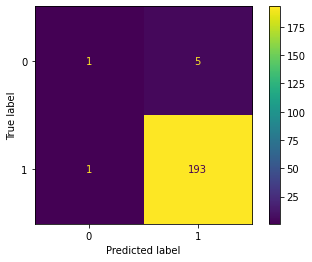

In [29]:
from sklearn.metrics import ConfusionMatrixDisplay

dis = ConfusionMatrixDisplay(confusion_matrix=cm)
dis.plot()

In [30]:
print(classification_report(table['True Value'], table['Prediction'], digits=3))

              precision    recall  f1-score   support

           0      0.500     0.167     0.250         6
           1      0.975     0.995     0.985       194

    accuracy                          0.970       200
   macro avg      0.737     0.581     0.617       200
weighted avg      0.961     0.970     0.963       200



In [31]:
table[table['True Value'] == 0]

,Prediction,True Value
6,0,0
114,1,0
125,1,0
126,1,0
147,1,0
175,1,0


In [32]:
new_xdata.iloc[0]

Age                            21.00
Financial Status                2.00
Has a Laptop                    2.00
Type of Internet Connection     2.00
CC100                           1.00
CC101                           1.25
CC102                           2.00
CS111/IT112                     1.25
English Prof                   98.17
Reading Compre                 94.82
Science Process                80.93
Quantitative                   44.18
Abstract                       98.81
CET OAPR                       96.17
SHS/HS GPA                     94.16
ABM/BAM                         0.00
GAS                             0.00
HUMSS                           1.00
STEM                            0.00
Sports Track                    0.00
TVL-HE                          0.00
TVL-ICT                         0.00
Female                          1.00
Male                            0.00
Prefer not to say               0.00
Name: 229, dtype: float64